# Day 2 — Activation Functions
Compare Sigmoid vs ReLU on MNIST

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

(x_train,y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Sigmoid Model

In [3]:
sigmoid_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])
sigmoid_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

d:\40-Days-DL-MLOps\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## ReLU Model

In [4]:
relu_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
relu_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])


## Training

In [5]:
history_sigmoid = sigmoid_model.fit(x_train, y_train, epochs=5, validation_split=0.1, verbose=2)
history_relu = relu_model.fit(x_train, y_train, epochs=5, validation_split=0.1, verbose=2)

Epoch 1/5
1688/1688 - 6s - 4ms/step - accuracy: 0.8902 - loss: 0.4240 - val_accuracy: 0.9453 - val_loss: 0.2002
Epoch 2/5
1688/1688 - 5s - 3ms/step - accuracy: 0.9385 - loss: 0.2112 - val_accuracy: 0.9575 - val_loss: 0.1502
Epoch 3/5
1688/1688 - 4s - 3ms/step - accuracy: 0.9550 - loss: 0.1555 - val_accuracy: 0.9667 - val_loss: 0.1205
Epoch 4/5
1688/1688 - 7s - 4ms/step - accuracy: 0.9650 - loss: 0.1217 - val_accuracy: 0.9710 - val_loss: 0.1026
Epoch 5/5
1688/1688 - 4s - 3ms/step - accuracy: 0.9723 - loss: 0.0978 - val_accuracy: 0.9733 - val_loss: 0.0936
Epoch 1/5
1688/1688 - 5s - 3ms/step - accuracy: 0.9210 - loss: 0.2777 - val_accuracy: 0.9650 - val_loss: 0.1251
Epoch 2/5
1688/1688 - 4s - 2ms/step - accuracy: 0.9638 - loss: 0.1242 - val_accuracy: 0.9707 - val_loss: 0.1027
Epoch 3/5
1688/1688 - 4s - 2ms/step - accuracy: 0.9744 - loss: 0.0854 - val_accuracy: 0.9722 - val_loss: 0.0943
Epoch 4/5
1688/1688 - 6s - 4ms/step - accuracy: 0.9804 - loss: 0.0640 - val_accuracy: 0.9775 - val_loss:

## Evaluation


In [6]:
sigmoid_loss, sigmoid_acc = sigmoid_model.evaluate(x_test, y_test)
relu_loss, relu_acc = relu_model.evaluate(x_test, y_test)

print(f"Sigmoid Test Accuracy: {sigmoid_acc:.4f}")
print(f"ReLU Test Accuracy: {relu_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9672 - loss: 0.1051
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9774 - loss: 0.0768
Sigmoid Test Accuracy: 0.9672
ReLU Test Accuracy: 0.9774


## Plot

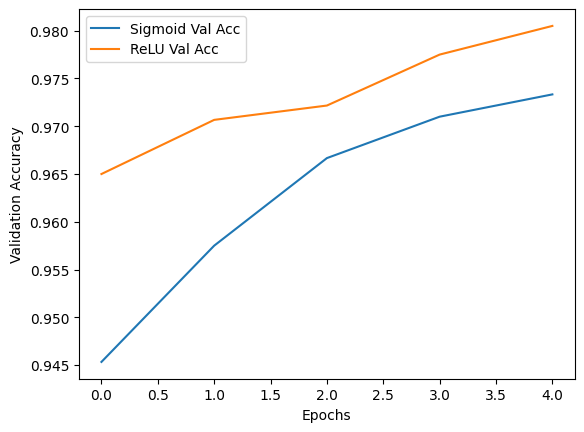

In [7]:
plt.plot(history_sigmoid.history['val_accuracy'], label='Sigmoid Val Acc')
plt.plot(history_relu.history['val_accuracy'], label='ReLU Val Acc')
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()